# Math 351 Assignment 3


# Problem 1 - Loss of Significance and Root Finding

(a) Use the bisection method, together with what you know about trigonometric functions, to approximate the smallest positive number $x$ such that $\sin(x) = \tan(x) - 1$, as accurately as you can.

(b) Do the same with Newton's method.  Does it take more steps?  And do you get the same result?



# A.)
See code below. We find that the closest approximation we get is when x = 0.94415527...

# B.)
Our answer for newton's method requries far fewer steps, arriving at an answer in only 5 iterations of the algorithm. The answer, however, changes depending on where we start. There are several x values that cause $sin(x) = tan(x) - 1$, so we must test a range of values to ensure we lock onto the correct root.

In [20]:
import numpy as np
from sympy import sin, tan, exp
from sympy.abc import x, a, b, c
exp = sin(x) - tan(x) + 1
a = 1.5
b = 0
for i in range(1, 25):
    c = (a+b)/2
    fc = exp.evalf(subs={x:c})
    if fc < 0:
        if exp.evalf(subs={x:a}) <= 0:
            a = c
        else:
            b = c
    else:
        if exp.evalf(subs={x:a}) > 0:
            a = c
        else:
            b = c
        
c

1.082649439573288

In [110]:
import numpy as np
from sympy import diff, sin, tan, exp
from sympy.abc import x, a, b, c
exp = sin(x) - tan(x) + 1
exprime = diff(exp, x)
root = np.Inf
starts = np.arange(0, 2, 0.1)
for start in starts:
    c = start
    for i in range(1, 5):
        c = c - exp.evalf(subs={x:c})/exprime.evalf(subs={x:c})
    if c < root and c > 0:
        root = c
    
root

1.08264952471866

# Problem 2 - Newton's method over $\mathbb{C}$

Consider the polynomial $f(z) = 3z^5 - 10z^3 + 23z$, where $z$ is taken to be a complex number.

The code in the following cell makes a picture.   This type of picture is sometimes called a "heat map", and this particular heat map has to do with evaluating $f$ at a complex number $z = x + \mathbf{i}y$.  

(a) Figure out what the code does, tell me the meaning of the picture, and explain why the picture is so symmetrical.  What are the dark-colored dots?  I recommend looking up the various functions that I have used in the numpy/scipy/matplotlib documentation - linspace, meshgrid, pcolormesh... , to see what they do.

(b) Using Newton's method and your insights from part (a), numerically find all complex roots of $f$ (how many should there be?)  Use the picture to guide your choice of initial guesses for Newton's Method.

(c) Let $g(x)$ be the number you obtain by running 100 iterations of Newton's Method, with $f$ as above.  Make a new heat map, but plot the magnitude of $g(x)$, instead the magnitude of $f(x)$.  The picture will be very, very different - there should be roughly 3 different colors in the picture, rather than a smooth gradient, and the picture will have an intricate "fractal structure" (see Wikipedia if you don't know what that means).

(d) Describe, and explain, everything you see in part (c).  In particular, answer the following questions:
 * What do the three colors represent?  
 * What does this picture tell you about Newton's Method?  
 * What is going on near $z=1$ and $z=-1$?  Run some Newton's Method computations there.
 * Why wasn't there any interesting feature there in the picture from part (a)?  Does Newton's Method only find roots, or does it sometimes find something else? 

Once you understand what you're seeing, add more colors to the picture in a meaningful way by plotting something other than |g(x)|.  There's a nice way to color the picture with 6 colors, for instance: 5 colors for the 5 features in part (a), and 1 color for the new feature at part (c).  Google "Basins of attraction" for inspiration.

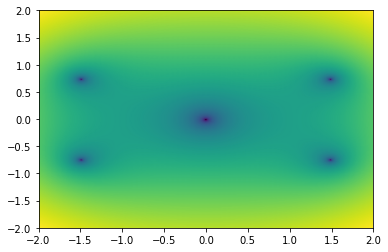

In [29]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as colors

n=401
x=np.linspace(-2,2,n)
y=np.linspace(-2,2,n)
X,Y=np.meshgrid(x,y)
Z = X+complex(0,1)*Y

def f(x):
    return 3*x**5 - 10*x**3 + 23*x

def norm_of_f(x):
    return np.abs(f(x))

C = norm_of_f(Z)

plt.pcolormesh(X,Y,C, norm=colors.LogNorm(), shading='auto')
plt.show()

# A.)
As far as code goes, you're creating a set of axes ranging from -2 to 2, with 400 intervals between each value, then creating a set of points from all possible combinations of x & y.  
A sort of Z-axis is created by adding 'y * i' to each value of x. We then define our function and a method to return the absolute value of our function at a given point.  
We then proceed to map the absolute value of the function of x + iy on top of it's corresponding point (x, y) in our graph.  
The values are represented on a logarithmic scale, so as not to give the graph too high of contrast.  
The dark dots represent the lowest attainable values, which occur when f(z) is near zero. Hence the large dark dot at (0, 0). Values with y < 1 tend to be darker in general, since the contribution from the imaginary component is almost nonexistent.
The graph as a whole is symmetrical since the graph of its absolute value is similarly symmetrical.  

# B.)
The roots can be found at (rounding to 5 decimals) x = $\pm$1.48921 $\pm$ 0.74236i and x = 0.


# C.)
See blotchy fractalized heatmap below.


# D.)
a - The white space represents values that converge to zero, the yellow represents values that converge to a nonzero root, and the dark spots represent potential roots or sinks for our function, where the starting value doesn't ever get away from the ending value due to a very low value of f prime near these points.  
b - It seems as though Newton's method uncovers attractors within our system of complex numbers, in that certain initial values with very little difference between the value of f(x) and f'(x) never reach an ending value that's significantly different from x.
c - At z = +/- 1, we've got the largest points of attraction. After running 1, 2, 5, and 100 iterations of Newton's method starting at these starting points, we find that regardless of how many times we run Newton's method, we always end up back at whatever value we started at. Thus we see that these points are attractors, and never truly find the roots of f(x).  
d - Since we were plotting the function alone, it did not indicate that other values surrounding these points would converge to the same value, simply that the value at those points wasn't drastically positive/negative.

In [55]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as colors

n=401
x=np.linspace(-2,2,n)
y=np.linspace(-2,2,n)
X,Y=np.meshgrid(x,y)
Z = X+complex(0,1)*Y

def f(x):
    return 3*x**5 - 10*x**3 + 23*x

def fprime(x):
    return 15*x**4 - 30*x**2 + 23

def newtonify(guess):
    return guess - f(guess)/fprime(guess)

start = 1.5 + complex(0,1)*0

for i in range(1, 100):
    start = newtonify(start)

start

0j

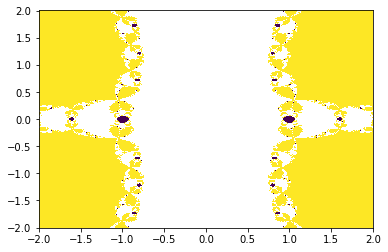

In [32]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as colors

n=401
x=np.linspace(-2,2,n)
y=np.linspace(-2,2,n)
X,Y=np.meshgrid(x,y)
Z = X+complex(0,1)*Y

def f(x):
    return 3*x**5 - 10*x**3 + 23*x

def fprime(x):
    return 15*x**4 - 30*x**2 + 23

def norm_of_g(x):
    return np.abs(g(x))

def norm_of_f(x):
    return np.abs(f(x))

def newtonify(guess):
    return guess - f(guess)/fprime(guess)

def g(x):
    for i in range(1, 101):
        x = newtonify(x)
    return x

C = norm_of_g(Z)

plt.pcolormesh(X,Y,C, norm=colors.LogNorm(), shading='auto')
plt.show()

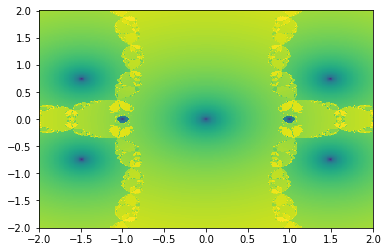

In [48]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as colors

n=401
x=np.linspace(-2,2,n)
y=np.linspace(-2,2,n)
X,Y=np.meshgrid(x,y)
Z = X+complex(0,1)*Y

def f(x):
    return 3*x**5 - 10*x**3 + 23*x

def fprime(x):
    return 15*x**4 - 30*x**2 + 23

def norm_of_g(x):
    return np.abs(g(x))

def norm_of_dg(x):
    return np.abs(dg(x))

def norm_of_f(x):
    return np.abs(f(x))

def newtonify(guess):
    return guess - f(guess)/fprime(guess)

def g(x):
    for i in range(1, 101):
        x = newtonify(x)
    return x

def dg(x):
    oldx = x
    for i in range(1, 101):
        x = newtonify(x)
    return oldx-x

C = norm_of_dg(Z)

plt.pcolormesh(X,Y,C, norm=colors.LogNorm(), shading='auto')
plt.show()

# Problem 3

(a) Suppose $f$ is a differentiable function which doesn't have a root at any of its critical points (but may well have lots of roots in other places).  I claim that between any two roots of f, you can find a root of the derivative f′.  Why is that?  In this situation, we say that the roots of $f'$ *interlace* the roots of $f$.


(b) Suppose f(x) is a degree-n polynomial with n distinct roots in the interval [−1, 1].
Describe an algorithm which finds, numerically, all of these roots with an error of at
most $\epsilon$.   Hint: it's going to be a recursive algorithm, using the bisection method - but what are the roots?  You might want to use sympy to find all those derivatives.

(c) Implement your algorithm of part $(b)$.  Test it on the polynomials $T_n(x)$, defined recursively by

$$T_0(x)=1, \quad T_1(x) = x, \quad T_{n+1}(x) = 2xT_{n}(x) - T_{n-1}(x),$$ 

Verify that for $n<20$, the roots of $T_{n-1}(x)$ also happen to interlace the roots of $T_{n}(x)$ (it's true for all $n$, but I just want you to test your code).  These polynomials $T_n(x)$ are called "Chebyshev polynomials of the first kind" and are going to come up in several places in Math 351 and Math 352.

# A.)
In order to have two distinct roots, the graph of must have crossed the x-axis twice. To do so, at some point, it would have needed to change direction from increasing to decreasing or vice-versa. Mathematically, this means that at some point between the two roots, we have a point where f'(x) = 0. These points are, coincidentally, the roots of f'(x).

# B/C.)
See code below.
Manually checking with the first 20 Chebyshev polynomials of the first kind, we see that the code runs well & that the method works to prove that the roots of T_n-1(x) interlace T_n(x).

In [18]:
import numpy as np
import sympy as sy
from sympy import degree
from sympy.abc import x

def interlace(f):
    if(degree(f) == 1):
        return [bisect(-1, 1, f)]
    else:
        temp = []
        prev = -1
        fprime = sy.diff(f, x)
        for a in interlace(fprime):
            temp.append(bisect(prev, a, f))
            prev = a
        temp.append(bisect(prev, 1, f))
    return temp
        
def bisect(a, b, exp):
    for i in range(1, 24):
        c = (a+b)/2
        fc = exp.evalf(subs={x:c})
        print(a, b, c)
        if np.abs(fc) < 1*10**-5:
            return c
        if fc < 0:
            if exp.evalf(subs={x:a}) <= 0:
                a = c
            else:
                b = c
        else:
            if exp.evalf(subs={x:a}) > 0:
                a = c
            else:
                b = c
    return c

def buildPoly(n, exp):
    if(n == 1):
        return 1
    elif(n == 2):
        return x
    else:
        exp = 2*x*buildPoly(n-1, exp) - buildPoly(n-2, exp)
    return exp

exp = sy.simplify(buildPoly(6, 1))
interlace(exp)

-1 1 0.0
-1 0.0 -0.5
-0.5 0.0 -0.25
-0.5 -0.25 -0.375
-0.375 -0.25 -0.3125
-0.375 -0.3125 -0.34375
-0.375 -0.34375 -0.359375
-0.359375 -0.34375 -0.3515625
-0.359375 -0.3515625 -0.35546875
-0.35546875 -0.3515625 -0.353515625
-0.35546875 -0.353515625 -0.3544921875
-0.3544921875 -0.353515625 -0.35400390625
-0.35400390625 -0.353515625 -0.353759765625
-0.353759765625 -0.353515625 -0.3536376953125
-0.3536376953125 -0.353515625 -0.35357666015625
-0.35357666015625 -0.353515625 -0.353546142578125
-0.35357666015625 -0.353546142578125 -0.3535614013671875
-0.3535614013671875 -0.353546142578125 -0.35355377197265625
-0.35355377197265625 -0.353546142578125 -0.3535499572753906
-0.35355377197265625 -0.3535499572753906 -0.35355186462402344
-0.35355377197265625 -0.35355186462402344 -0.35355281829833984
-0.35355377197265625 -0.35355281829833984 -0.35355329513549805
-0.35355377197265625 -0.35355329513549805 -0.35355353355407715
-0.35355353355407715 -0.35355329513549805 -0.3535534143447876
0.0 1 0.5
0.0 0.5

[-0.9510565226340353,
 -0.5877854873499772,
 0.0,
 0.5877854873499772,
 0.9510565226340353]